In [2]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce
from anndata import AnnData

In [3]:
# paths
nsg_bus_1 = "/mnt/shared/nationwide/Counts/NSG_BUS_1/outs/filtered_feature_bc_matrix.h5"
nsg_bus_2 = "/mnt/shared/nationwide/Counts/NSG_BUS_2/outs/filtered_feature_bc_matrix.h5"
nsg_bus_3 = "/mnt/shared/nationwide/Counts/NSG_BUS_3/outs/filtered_feature_bc_matrix.h5"

nsg_ctl_1 = "/mnt/shared/nationwide/Counts/NSG_CNTL_1/outs/filtered_feature_bc_matrix.h5"
nsg_ctl_2 = "/mnt/shared/nationwide/Counts/NSG_CNTL_2/outs/filtered_feature_bc_matrix.h5"
nsg_ctl_3 = "/mnt/shared/nationwide/Counts/NSG_CNTL_3/outs/filtered_feature_bc_matrix.h5"

nsg_s_bus_1 = "/mnt/shared/nationwide/Counts/NSG_S_BUS_1/outs/filtered_feature_bc_matrix.h5"
nsg_s_bus_2 = "/mnt/shared/nationwide/Counts/NSG_S_BUS_2/outs/filtered_feature_bc_matrix.h5"
nsg_s_bus_3 = "/mnt/shared/nationwide/Counts/NSG_S_BUS_3/outs/filtered_feature_bc_matrix.h5"

nsg_s_ctl_1 = "/mnt/shared/nationwide/Counts/NSG_S_CNTL_1/outs/filtered_feature_bc_matrix.h5"
nsg_s_ctl_2 = "/mnt/shared/nationwide/Counts/NSG_S_CNTL_2/outs/filtered_feature_bc_matrix.h5"
nsg_s_ctl_3 = "/mnt/shared/nationwide/Counts/NSG_S_CNTL_3/outs/filtered_feature_bc_matrix.h5"

In [4]:
def integrate(datasets: list, method: str = "scanorama", key: str = "Trial", resolution: int = 0.3) -> AnnData:
    """
    Datasets: list of datasets to concatenate
    Method: Integration Method
    Key: Key differentiating different datasets 
    Resolution: Clustering resolution

    will add additional parameters for normalization
    """
    dataset = ad.concat(datasets)
    sc.pp.recipe_zheng17(dataset) # runs a predefined normalization process
    sc.pp.pca(dataset)
    if method == "scanorama":
        sce.pp.scanorama_integrate(dataset, key, verbose=1)
        sc.pp.neighbors(dataset, use_rep="X_scanorama")
    elif method == "harmony":
        sce.pp.harmony_integrate(dataset, key, verbose=1)
        sc.pp.neighbors(dataset, use_rep="X_pca_harmony")
    elif method == "merge":
        sc.pp.neighbors(dataset, use_rep="X_pca")
    else:
        raise ValueError("Invalid Integration Method")
    sc.tl.umap(dataset)
    sc.tl.leiden(
        dataset, key_added="clusters", n_iterations=2, directed=False, resolution=resolution
    )
    sc.pl.umap(
        dataset, color=["clusters"], palette=sc.pl.palettes.default_20
    )
    return dataset

In [4]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def score_clusters(dataset: AnnData, key: str = "clusters", random_state: int = 42) -> tuple:
    """
    dataset: AnnData object with clusters precalculated
    key: where the clusters are located within ann data object
    random_state: to determine 
    """
    sil = silhouette_score(dataset.X, dataset.obs[key], random_state=random_state)
    davies = davies_bouldin_score(dataset.X, dataset.obs[key])
    calinski = calinski_harabasz_score(dataset.X, dataset.obs[key])
    return sil, davies, calinski

In [5]:
def qc(dataset: AnnData) -> AnnData:
    sc.pp.calculate_qc_metrics(dataset, inplace=True)
    sc.pp.filter_cells(dataset, min_genes=100)
    sc.pp.filter_genes(dataset, min_cells=3)
    sc.pp.scrublet(dataset, batch_key="Trial")
    return dataset[dataset.obs["predicted_doublet"] == False]

# NSG Bulsulfan

In [6]:
nsg_bus_1_data = sc.read_10x_h5(nsg_bus_1)
nsg_bus_2_data = sc.read_10x_h5(nsg_bus_2)
nsg_bus_3_data = sc.read_10x_h5(nsg_bus_3)

nsg_bus_1_data.obs["Trial"] = "1"
nsg_bus_2_data.obs["Trial"] = "2"
nsg_bus_3_data.obs["Trial"] = "3"

nsg_bus_1_data.var_names_make_unique()
nsg_bus_2_data.var_names_make_unique()
nsg_bus_3_data.var_names_make_unique()

nsg_bus_1_data = qc(nsg_bus_1_data)
nsg_bus_2_data = qc(nsg_bus_2_data)
nsg_bus_3_data = qc(nsg_bus_3_data)

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: Use

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Processing datasets 1 <=> 2
Processing datasets 2 <=> 3
Processing datasets 1 <=> 3


/tmp/ipykernel_152296/4078638695.py:24: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(


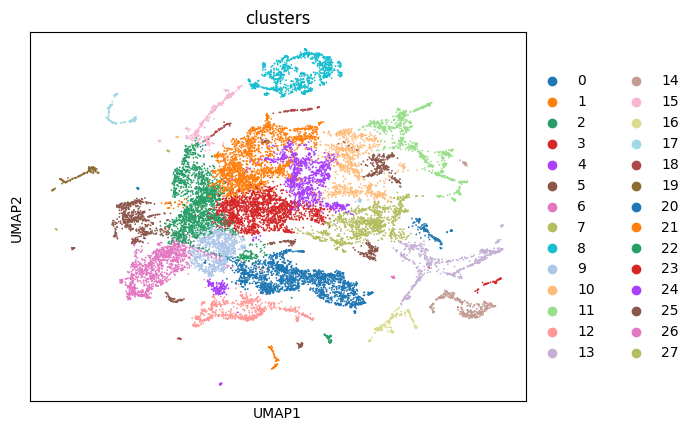

In [8]:
nsg_bus_scan = integrate([nsg_bus_1_data, nsg_bus_2_data, nsg_bus_3_data])

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-23 01:46:01,198 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-23 01:46:06,119 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-23 01:46:06,197 - harmonypy - INFO - Iteration 1 of 10
2024-04-23 01:46:09,922 - harmonypy - INFO - Iteration 2 of 10
2024-0

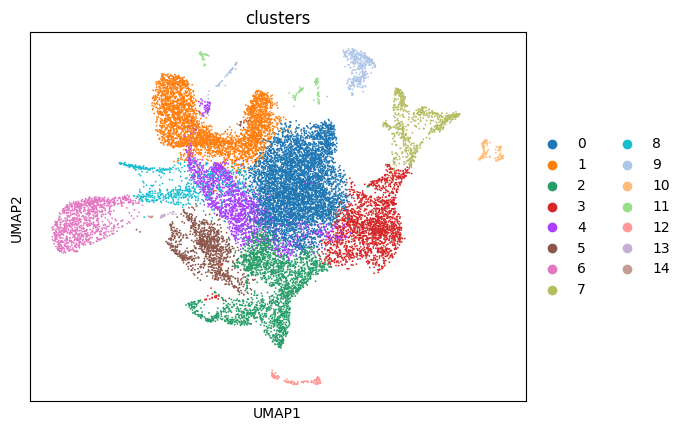

In [9]:
nsg_bus_harm = integrate([nsg_bus_1_data, nsg_bus_2_data, nsg_bus_3_data], method="harmony")

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


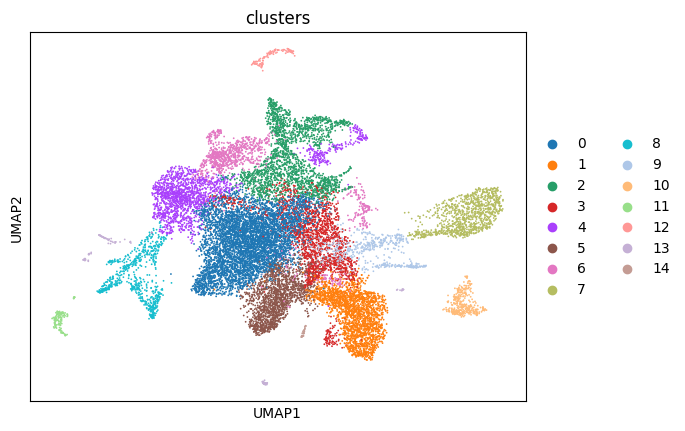

In [10]:
nsg_bus_merge = integrate([nsg_bus_1_data, nsg_bus_2_data, nsg_bus_3_data], method="merge")

# NSG CONTROL

In [11]:
nsg_ctl_1_data = sc.read_10x_h5(nsg_ctl_1)
nsg_ctl_2_data = sc.read_10x_h5(nsg_ctl_2)
nsg_ctl_3_data = sc.read_10x_h5(nsg_ctl_3)

nsg_ctl_1_data.obs["Trial"] = "1"
nsg_ctl_2_data.obs["Trial"] = "2"
nsg_ctl_3_data.obs["Trial"] = "3"

nsg_ctl_1_data.var_names_make_unique()
nsg_ctl_2_data.var_names_make_unique()
nsg_ctl_3_data.var_names_make_unique()

nsg_ctl_1_data = qc(nsg_ctl_1_data)
nsg_ctl_2_data = qc(nsg_ctl_2_data)
nsg_ctl_3_data = qc(nsg_ctl_3_data)

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: Use

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Processing datasets 1 <=> 2
Processing datasets 2 <=> 3
Processing datasets 1 <=> 3


/home/user/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


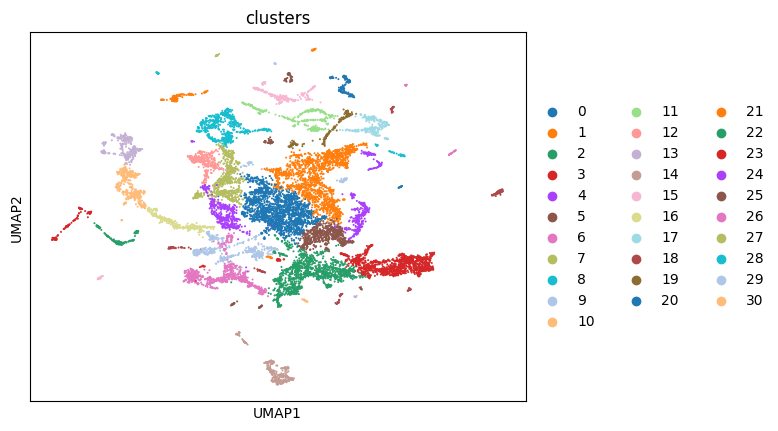

In [12]:
nsg_ctl_scan = integrate([nsg_ctl_1_data, nsg_ctl_2_data, nsg_ctl_3_data])

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-23 01:48:34,364 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-23 01:48:38,047 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-23 01:48:38,143 - harmonypy - INFO - Iteration 1 of 10
2024-04-23 01:48:40,474 - harmonypy - INFO - Iteration 2 of 10
2024-0

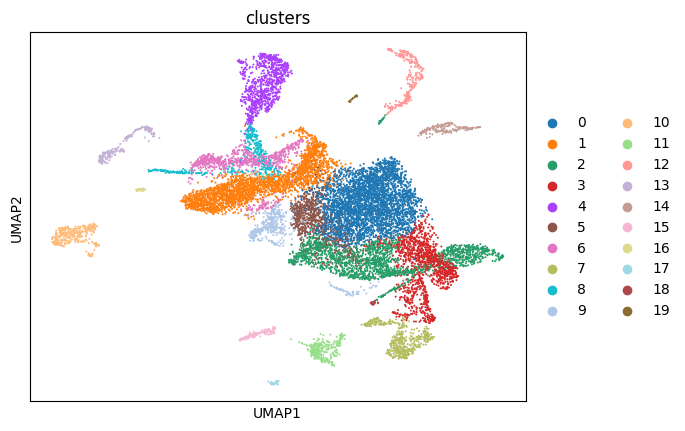

In [13]:
nsg_ctl_harm = integrate([nsg_ctl_1_data, nsg_ctl_2_data, nsg_ctl_3_data], "harmony")

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


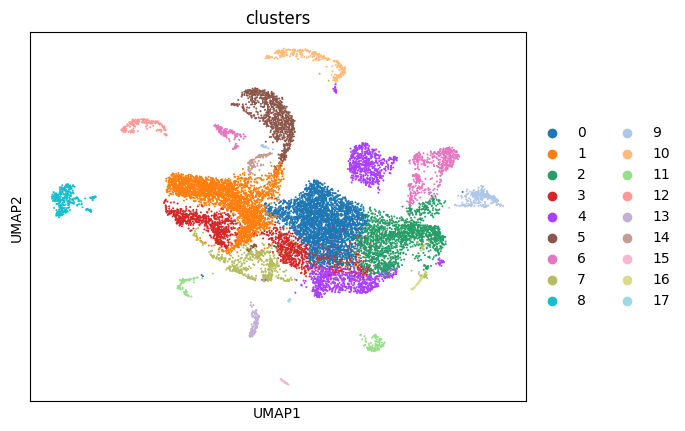

In [14]:
nsg_ctl_merge = integrate([nsg_ctl_1_data, nsg_ctl_2_data, nsg_ctl_3_data], "merge")

# NSG S BUS

In [15]:
nsg_s_bus_1_data = sc.read_10x_h5(nsg_s_bus_1)
nsg_s_bus_2_data = sc.read_10x_h5(nsg_s_bus_2)
nsg_s_bus_3_data = sc.read_10x_h5(nsg_s_bus_3)

nsg_s_bus_1_data.obs["Trial"] = "1"
nsg_s_bus_2_data.obs["Trial"] = "2"
nsg_s_bus_3_data.obs["Trial"] = "3"

nsg_s_bus_1_data.var_names_make_unique()
nsg_s_bus_2_data.var_names_make_unique()
nsg_s_bus_3_data.var_names_make_unique()

nsg_s_bus_1_data = qc(nsg_ctl_1_data)
nsg_s_bus_2_data = qc(nsg_ctl_2_data)
nsg_s_bus_3_data = qc(nsg_ctl_3_data)

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: Use

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Processing datasets 1 <=> 2
Processing datasets 2 <=> 3
Processing datasets 1 <=> 3


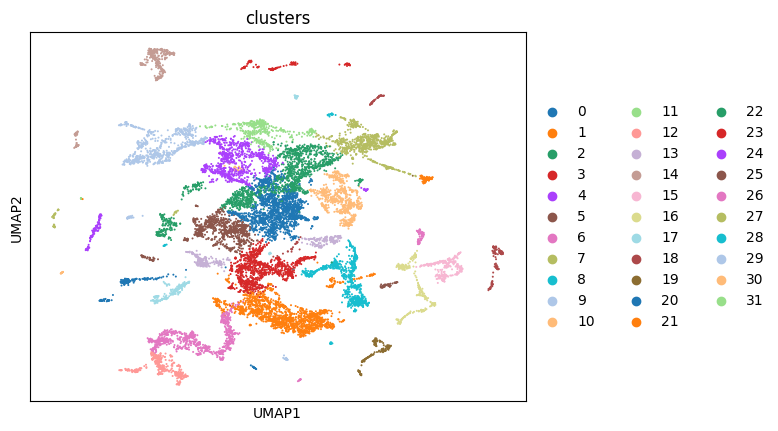

In [16]:
nsg_s_bus_scan = integrate([nsg_s_bus_1_data, nsg_s_bus_2_data, nsg_s_bus_3_data])

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


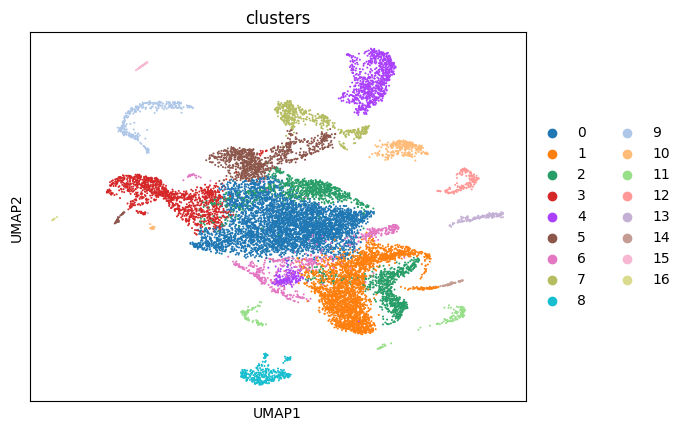

In [17]:
nsg_s_bus_merge = integrate([nsg_s_bus_1_data, nsg_s_bus_2_data, nsg_s_bus_3_data], "merge")

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-23 01:51:15,248 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-23 01:51:19,249 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-23 01:51:19,296 - harmonypy - INFO - Iteration 1 of 10
2024-04-23 01:51:21,713 - harmonypy - INFO - Iteration 2 of 10
2024-0

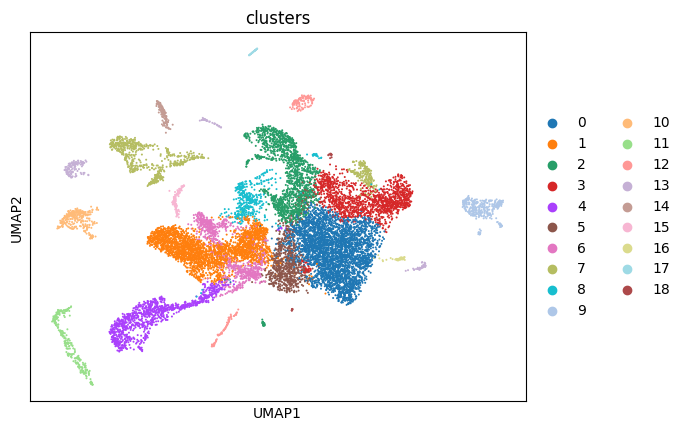

In [18]:
nsg_s_bus_harm = integrate([nsg_s_bus_1_data, nsg_s_bus_2_data, nsg_s_bus_3_data], "harmony")

# NSG S CONTROL

In [19]:
nsg_s_ctl_1_data = sc.read_10x_h5(nsg_ctl_1)
nsg_s_ctl_2_data = sc.read_10x_h5(nsg_ctl_2)
nsg_s_ctl_3_data = sc.read_10x_h5(nsg_ctl_3)

nsg_s_ctl_1_data.obs["Trial"] = "1"
nsg_s_ctl_2_data.obs["Trial"] = "2"
nsg_s_ctl_3_data.obs["Trial"] = "3"

nsg_s_ctl_1_data.var_names_make_unique()
nsg_s_ctl_2_data.var_names_make_unique()
nsg_s_ctl_3_data.var_names_make_unique()

nsg_s_ctl_1_data = qc(nsg_ctl_1_data)
nsg_s_ctl_2_data = qc(nsg_ctl_2_data)
nsg_s_ctl_3_data = qc(nsg_ctl_3_data)

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: Use

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Processing datasets 1 <=> 2
Processing datasets 2 <=> 3
Processing datasets 1 <=> 3


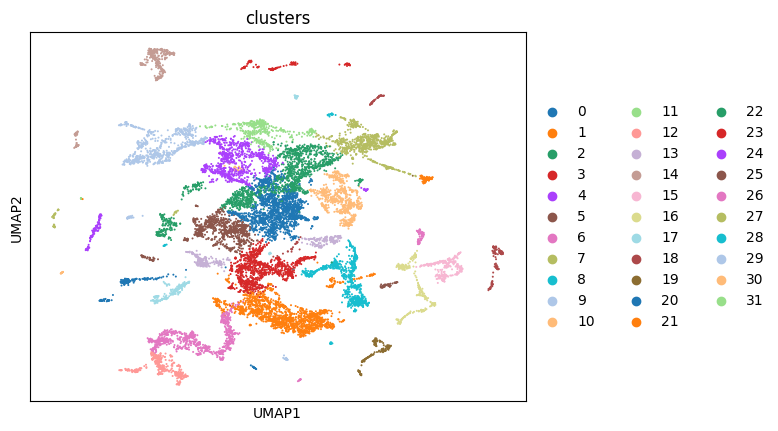

In [20]:
nsg_s_ctl_scan = integrate([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data])

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-23 01:53:28,133 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-23 01:53:32,153 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-23 01:53:32,241 - harmonypy - INFO - Iteration 1 of 10
2024-04-23 01:53:34,631 - harmonypy - INFO - Iteration 2 of 10
2024-0

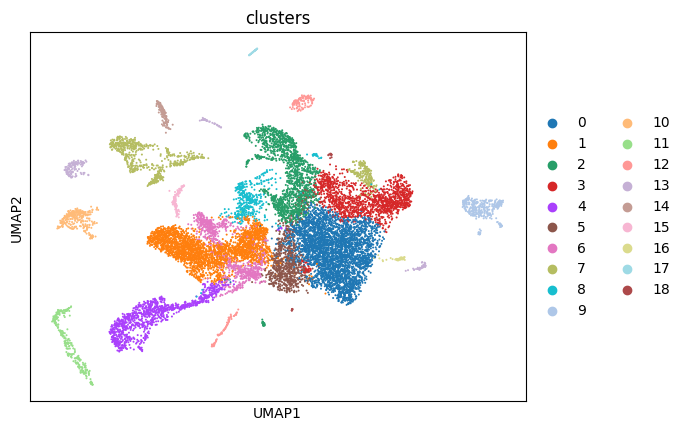

In [21]:
nsg_s_ctl_harm = integrate([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data], "harmony")

/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


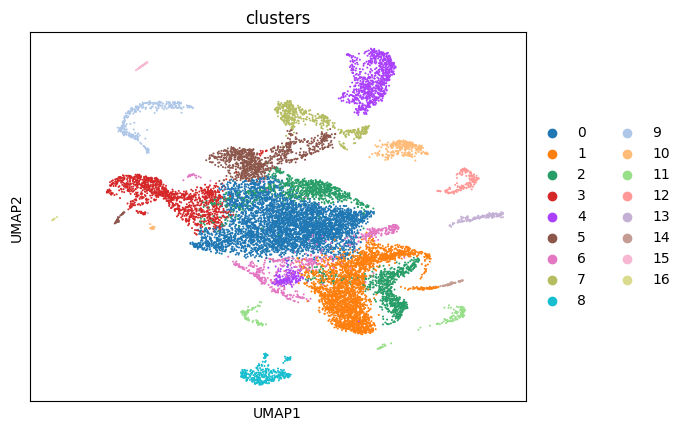

In [22]:
nsg_s_ctl_merge = integrate([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data], "merge")

# Evaluation

In [23]:
s_ctl = [nsg_s_ctl_merge, nsg_s_ctl_harm, nsg_s_ctl_scan]
s_bus = [nsg_s_bus_merge, nsg_s_bus_harm, nsg_s_bus_scan]
ctl = [nsg_ctl_merge, nsg_ctl_harm, nsg_ctl_scan]
bus = [nsg_bus_merge, nsg_bus_harm, nsg_bus_scan]

In [24]:
sils = []
davies = []
calinski = []
for data in s_ctl:
    s, d, c = score_clusters(data)
    sils.append(s)
    davies.append(d)
    calinski.append(c)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

res = pd.DataFrame({"Silhouette Score": sils, "Davies Bouldin Score": davies, "Calinski Harabasz Score": calinski})
res.set_index(pd.Index(["Merge", "Harmony", "Scanorama"]), inplace=True)

In [26]:
res.transpose()

,Merge,Harmony,Scanorama
Silhouette Score,-0.009047,-0.019154,-0.008621
Davies Bouldin Score,3.361294,3.832776,3.890197
Calinski Harabasz Score,285.702810,252.961268,174.175422


In [ ]:
res.transpose().plot(kind="bar")